# 05 - Python Finance

**Capitulo 05**: Calcular o desempenho da carteira de ações. Índice Sharpe, Beta, CAGR, Volatilidade Anual e Drawdown são alguns dos indicadores de desempenho que serão calculados.

## 1. Importando bibliotecas

Instalando o YFinance


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Importando o YFinance e sobrescrevendo os métodos do pandas_datareader

In [2]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

Importando as Bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Instalando o PyFolio

In [ ]:
!pip install pyfolio

In [ ]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

Importando as Bibliotecas

In [ ]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

## 2. Obtendo e tratando os dados

In [6]:
tickers = "PETR3.SA PRIO3.SA BBDC4.SA ITUB4.SA BBAS3.SA BIDI4.SA ITSA4.SA VALE3.SA MGLU3.SA MDIA3.SA ALPA4.SA WEGE3.SA TAEE11.SA TRPL4.SA ALUP11.SA EGIE3.SA EQTL3.SA ENGI11.SA SAPR11.SA MRVE3.SA EZTC3.SA TRIS3.SA ABEV3.SA QUAL3.SA FLRY3.SA RADL3.SA HYPE3.SA GNDI3.SA VIVT3.SA RENT3.SA RAIL3.SA JBSS3.SA LWSA3.SA TOTS3.SA SUZB3.SA CSAN3.SA UNIP6.SA NTCO3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']

[*********************100%***********************]  39 of 39 completed


In [ ]:
#tickers = ["tickers = "PETR3.SA", "PRIO3.SA", "BBDC4.SA", "ITUB4.SA", "BBAS3.SA", "BIDI4.SA", "ITSA4.SA", "VALE3.SA", "MGLU3.SA", "MDIA3.SA", "ALPA4.SA", "WEGE3.SA", "TAEE11.SA", "TRPL4.SA", "ALUP11.SA", "EGIE3.SA", "EQTL3.SA", "ENGI11.SA", "SAPR11.SA", "MRVE3.SA", "EZTC3.SA", "TRIS3.SA", "ABEV3.SA", "QUAL3.SA", "FLRY3.SA", "RADL3.SA", "HYPE3.SA", "GNDI3.SA", "VIVT3.SA", "RENT3.SA", "RAIL3.SA", "JBSS3.SA", "LWSA3.SA", "TOTS3.SA", "SUZB3.SA", "CSAN3.SA", "UNIP6.SA", "NTCO3.SA", '^BVSP']

#tickers1 = "PETR3.SA PRIO3.SA"
#tickers2 = "BBDC4.SA ITUB4.SA BBAS3.SA BIDI4.SA ITSA4.SA"
#tickers3 = "VALE3.SA"
#tickers4 = "MGLU3.SA MDIA3.SA ALPA4.SA"
#tickers5 = "WEGE3.SA"
#tickers6 = "TAEE11.SA TRPL4.SA ALUP11.SA EGIE3.SA EQTL3.SA ENGI11.SA"
#tickers7 = "SAPR11.SA"
#tickers8 = "MRVE3.SA EZTC3.SA TRIS3.SA"
#tickers9 = "ABEV3.SA"
#tickers10 = "QUAL3.SA FLRY3.SA RADL3.SA HYPE3.SA GNDI3.SA"
#tickers11 = "VIVT3.SA"
#tickers12 = "RENT3.SA RAIL3.SA"
#tickers13 = "JBSS3.SA"
#tickers14 = "LWSA3.SA TOTS3.SA"
#tickers15 = "SUZB3.SA CSAN3.SA"
#tickers16 = "UNIP6.SA"
#tickers17 = "NTCO3.SA"

#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

Exibindo dados

In [7]:
#dados do fechamento ajustados dos ultimos cincos anos
dados_yahoo 

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-28,16.686310,5.667670,10.441355,15.953269,12.547505,NaN,27.572239,20.825983,12.433537,7.509503,9.843007,8.305499,NaN,23.899183,5.221478,15.543990,9.976722,NaN,21.033812,0.111258,7.939578,NaN,9.967245,2.390000,10.601807,10.167109,3.350000,7.989112,NaN,19.040724,11.635248,8.982227,1.192565,8.026836,2.385336,12.417777,27.090281,10.098055,50838.0
2016-03-29,16.720892,5.895848,10.805165,16.429482,12.766197,NaN,27.711758,20.966471,12.433537,7.441684,9.878820,8.293479,NaN,24.068083,5.277091,15.636973,9.819389,NaN,21.731260,0.112750,8.040164,NaN,9.967245,2.220000,10.693666,9.997979,3.590000,8.303690,NaN,NaN,11.902382,8.818012,NaN,8.013779,2.397403,12.352291,27.124844,10.360620,51155.0
2016-03-30,16.556622,5.859045,11.336327,16.088194,12.784419,NaN,27.676876,21.185635,12.433537,7.546162,9.896728,8.694131,NaN,24.076532,5.233836,15.725072,9.828646,NaN,22.106810,0.113422,8.040164,NaN,10.032879,1.975000,11.160605,10.076780,3.300000,8.533247,NaN,NaN,11.825209,8.728160,NaN,7.966439,2.381313,12.720649,27.408184,10.296753,51249.0
2016-03-31,16.254025,5.704473,10.805165,15.691348,12.328810,NaN,27.371681,20.612440,NaN,7.526000,9.741532,8.634033,NaN,23.840075,5.048459,15.274804,10.078526,NaN,22.109962,0.109131,7.892637,NaN,9.967245,1.805000,11.160605,10.028729,3.330000,8.417052,NaN,NaN,11.920191,8.440008,1.204693,7.892975,2.461763,12.401404,26.447580,9.970322,50055.0
2016-04-01,16.279957,5.778079,10.856100,15.691348,12.574837,NaN,27.772795,20.910278,NaN,7.427022,9.669903,8.425694,NaN,23.907629,5.048459,15.380082,9.967467,NaN,21.497726,0.110698,8.046867,NaN,9.873479,1.975000,11.834220,10.157501,3.460000,8.636580,NaN,NaN,11.647116,8.548451,1.212778,7.871752,2.433606,12.696093,26.188644,10.161922,50562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,15.540000,36.049999,24.600000,30.790001,26.600000,51.389999,92.309998,41.630001,44.139999,21.809999,32.349998,25.219999,83.900002,33.049999,10.500437,28.318043,27.430000,24.809999,31.660000,21.910000,17.980000,50.889999,23.080000,90.550003,33.000000,26.070000,20.400000,57.840000,21.799999,72.410004,35.799999,29.240000,10.390000,24.750000,64.849998,93.209999,45.830002,71.300003,114979.0
2021-03-23,15.080000,36.230000,24.910000,29.680000,26.309999,55.580002,92.180000,41.549999,43.860001,21.570000,31.920000,25.450001,85.379997,32.669998,10.240920,27.599360,27.549999,24.740000,31.000000,21.510000,17.459999,50.320000,22.549999,87.029999,32.540001,25.959999,19.980000,56.549999,21.940001,71.769997,36.130001,28.799999,10.260000,24.820000,64.570000,91.059998,45.570000,71.610001,113262.0
2021-03-24,14.800000,34.669998,24.610001,29.139999,26.040001,53.790001,90.889999,40.310001,41.880001,21.020000,30.780001,24.840000,83.000000,31.700001,10.031310,27.120239,27.520000,24.100000,30.700001,20.370001,16.920000,48.070000,22.530001,88.010002,31.980000,25.059999,19.610001,55.130001,21.850000,73.660004,35.730000,27.840000,9.740000,24.170000,66.050003,93.150002,45.000000,70.519997,112064.0


In [8]:
#tabela retorno, calcular o retorno diario de todos os ativos
retorno = dados_yahoo.pct_change() 
retorno

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-29,0.002072,0.040260,0.034843,0.029850,0.017429,NaN,0.005060,0.006746,0.000000,-0.009031,0.003638,-0.001447,NaN,0.007067,0.010651,0.005982,-0.015770,NaN,0.033158,0.013410,0.012669,NaN,0.000000,-0.071130,0.008664,-0.016635,0.071642,0.039376,NaN,0.000000,0.022959,-0.018282,0.000000,-0.001627,0.005059,-0.005274,0.001276,0.026002,0.006235
2016-03-30,-0.009824,-0.006242,0.049158,-0.020773,0.001427,NaN,-0.001259,0.010453,0.000000,0.014040,0.001813,0.048309,NaN,0.000351,-0.008197,0.005634,0.000943,NaN,0.017282,0.005964,0.000000,NaN,0.006585,-0.110360,0.043665,0.007882,-0.080780,0.027645,NaN,0.000000,-0.006484,-0.010190,0.000000,-0.005907,-0.006712,0.029821,0.010446,-0.006164,0.001838
2016-03-31,-0.018276,-0.026382,-0.046855,-0.024667,-0.035638,NaN,-0.011027,-0.027056,0.000000,-0.002672,-0.015681,-0.006912,NaN,-0.009821,-0.035419,-0.028634,0.025424,NaN,0.000143,-0.037836,-0.018349,NaN,-0.006542,-0.086076,0.000000,-0.004768,0.009091,-0.013617,NaN,0.000000,0.008032,-0.033014,0.010169,-0.009222,0.033784,-0.025097,-0.035048,-0.031702,-0.023298
2016-04-01,0.001595,0.012903,0.004714,0.000000,0.019955,NaN,0.014654,0.014449,0.000000,-0.013151,-0.007353,-0.024130,NaN,0.002834,0.000000,0.006892,-0.011019,NaN,-0.027691,0.014362,0.019541,NaN,-0.009407,0.094183,0.060356,0.012840,0.039039,0.026081,NaN,0.000000,-0.022909,0.012849,0.006711,-0.002689,-0.011438,0.023762,-0.009791,0.019217,0.010129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,-0.003846,0.007546,-0.010856,0.002932,-0.005236,0.009301,-0.015990,-0.014441,-0.018020,-0.020216,0.005595,-0.003949,-0.012360,0.005476,0.007663,0.005672,-0.013309,0.026479,0.004442,-0.017048,0.014100,-0.012420,-0.018708,-0.035984,0.008249,0.007731,-0.017814,-0.024621,-0.024172,-0.021486,-0.001116,0.011415,0.001929,-0.005625,0.040931,-0.016565,-0.013348,-0.009034,-0.010695
2021-03-23,-0.029601,0.004993,0.012602,-0.036051,-0.010902,0.081533,-0.001408,-0.001922,-0.006343,-0.011004,-0.013292,0.009120,0.017640,-0.011498,-0.024715,-0.025379,0.004375,-0.002821,-0.020846,-0.018256,-0.028921,-0.011201,-0.022964,-0.038874,-0.013939,-0.004219,-0.020588,-0.022303,0.006422,-0.008839,0.009218,-0.015048,-0.012512,0.002828,-0.004318,-0.023066,-0.005673,0.004348,-0.014933
2021-03-24,-0.018568,-0.043058,-0.012043,-0.018194,-0.010262,-0.032206,-0.013994,-0.029844,-0.045144,-0.025498,-0.035714,-0.023969,-0.027875,-0.029691,-0.020468,-0.017360,-0.001089,-0.025869,-0.009677,-0.052999,-0.030928,-0.044714,-0.000887,0.011261,-0.017210,-0.034669,-0.018518,-0.025110,-0.004102,0.026334,-0.011071,-0.033333,-0.050682,-0.026189,0.022921,0.022952,-0.012508,-0.015221,-0.010577


In [9]:
#tabela retorno acumulado produtorio da tabela retorno
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-03-29,1.002072,1.040260,1.034843,1.029850,1.017429,NaN,1.005060,1.006746,1.000000,0.990969,1.003638,0.998553,NaN,1.007067,1.010651,1.005982,0.984230,NaN,1.033158,1.013410,1.012669,NaN,1.000000,0.928870,1.008664,0.983365,1.071642,1.039376,NaN,1.000000,1.022959,0.981718,1.000000,0.998373,1.005059,0.994726,1.001276,1.026002,1.006235
2016-03-30,0.992228,1.033766,1.085714,1.008458,1.018881,NaN,1.003795,1.017269,1.000000,1.004882,1.005458,1.046792,NaN,1.007421,1.002367,1.011650,0.985158,NaN,1.051013,1.019453,1.012669,NaN,1.006585,0.826360,1.052708,0.991116,0.985075,1.068110,NaN,1.000000,1.016326,0.971714,1.000000,0.992476,0.998314,1.024390,1.011735,1.019677,1.008085
2016-03-31,0.974093,1.006493,1.034843,0.983582,0.982571,NaN,0.992726,0.989746,1.000000,1.002197,0.989691,1.039556,NaN,0.997527,0.966864,0.982682,1.010204,NaN,1.051163,0.980881,0.994088,NaN,1.000000,0.755230,1.052708,0.986389,0.994030,1.053565,NaN,1.000000,1.024490,0.939634,1.010169,0.983323,1.032041,0.998682,0.976276,0.987351,0.984598
2016-04-01,0.975648,1.019480,1.039721,0.983582,1.002178,NaN,1.007274,1.004048,1.000000,0.989016,0.982413,1.014472,NaN,1.000353,0.966864,0.989455,0.999072,NaN,1.022056,0.994969,1.013513,NaN,0.990593,0.826360,1.116246,0.999055,1.032836,1.081044,NaN,1.000000,1.001020,0.951707,1.016949,0.980679,1.020236,1.022413,0.966717,1.006325,0.994571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,0.931302,6.360639,2.356016,1.930012,2.119943,0.717164,3.347933,1.998945,3.550076,2.904320,3.286597,3.036542,4.177621,1.382892,2.011008,1.821800,2.749400,4.827104,1.505196,196.930277,2.264604,1.384948,2.315585,37.887029,3.112677,2.564151,6.089552,7.239853,1.326131,3.802902,3.076857,3.255317,8.712310,3.083407,27.186946,7.506174,1.691751,7.060766,2.261674
2021-03-23,0.903735,6.392398,2.385706,1.860434,2.096831,0.775637,3.343218,1.995104,3.527556,2.872360,3.242911,3.064235,4.251315,1.366992,1.961307,1.775565,2.761428,4.813485,1.473818,193.335022,2.199109,1.369436,2.262410,36.414224,3.069288,2.553331,5.964179,7.078383,1.334647,3.769289,3.105220,3.206332,8.603302,3.092127,27.069562,7.333035,1.682153,7.091465,2.227900
2021-03-24,0.886955,6.117152,2.356974,1.826585,2.075313,0.750657,3.296432,1.935563,3.368309,2.799120,3.127093,2.990790,4.132808,1.326405,1.921163,1.744741,2.758421,4.688965,1.459555,183.088541,2.131096,1.308203,2.260404,36.824267,3.016467,2.464811,5.853732,6.900642,1.329172,3.868551,3.070841,3.099454,8.167266,3.011149,27.690022,7.501343,1.661112,6.983523,2.204335


In [12]:
#carteira R$ 1000, excluir coluna ibovespa, inserir coluna saldo e coluna retorno
carteira = 1000 * retorno_acumulado.iloc[:, :38]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ALPA4.SA,ALUP11.SA,BBAS3.SA,BBDC4.SA,BIDI4.SA,CSAN3.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GNDI3.SA,HYPE3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LWSA3.SA,MDIA3.SA,MGLU3.SA,MRVE3.SA,NTCO3.SA,PETR3.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SAPR11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-28,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,38000.000000,NaN
2016-03-29,1002.072486,1040.259668,1034.843231,1029.850465,1017.429108,NaN,1005.060116,1006.745788,1000.000000,990.968894,1003.638454,998.552753,NaN,1007.067168,1010.650640,1005.981942,984.230048,NaN,1033.158457,1013.409587,1012.668927,NaN,1000.000000,928.870264,1008.664454,983.364955,1071.641796,1039.375786,NaN,1000.000000,1022.959004,981.717776,1000.000000,998.373243,1005.059060,994.726435,1001.275847,1026.001508,33258.617862,-0.124773
2016-03-30,992.227864,1033.766043,1085.714150,1008.457507,1018.881337,NaN,1003.795018,1017.269368,1000.000000,1004.881650,1005.457730,1046.792109,NaN,1007.420718,1002.366707,1011.649632,985.157844,NaN,1051.013010,1019.453350,1012.668927,NaN,1006.584946,826.359806,1052.707884,991.115551,985.074641,1068.109521,NaN,1000.000000,1016.326294,971.714430,1000.000000,992.475538,998.313514,1024.390171,1011.734966,1019.676863,33271.557090,0.000389
2016-03-31,974.093415,1006.493457,1034.843231,983.581990,982.570588,NaN,992.726100,989.746321,1000.000000,1002.196707,989.690675,1039.556217,NaN,997.526747,966.863813,982.682309,1010.204131,NaN,1051.162905,980.881484,994.087686,NaN,1000.000000,755.230070,1052.707884,986.389440,994.029856,1053.565386,NaN,1000.000000,1024.489605,939.634220,1010.169469,983.323310,1032.040544,998.681513,976.275617,987.350709,32772.795398,-0.014991
2016-04-01,975.647522,1019.480454,1039.721410,983.581990,1002.178230,NaN,1007.273831,1004.047601,1000.000000,989.016463,982.413475,1014.471784,NaN,1000.353390,966.863813,989.455217,999.072395,NaN,1022.055673,994.969245,1013.513226,NaN,990.592565,826.359806,1116.245592,999.054966,1032.835862,1081.043689,NaN,1000.000000,1001.019963,951.707312,1016.949181,980.679296,1020.236138,1022.412670,966.717357,1006.324645,33016.294763,0.007430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,931.302375,6360.638619,2356.016146,1930.012019,2119.943334,717.164226,3347.932601,1998.945307,3550.075708,2904.319821,3286.597092,3036.542305,4177.621474,1382.892413,2011.008349,1821.800098,2749.400149,4827.104418,1505.195563,196930.277205,2264.603914,1384.948488,2315.584666,37887.028903,3112.677029,2564.150580,6089.552298,7239.853118,1326.130749,3802.901844,3076.857379,3255.317274,8712.310440,3083.406560,27186.945817,7506.174303,1691.750729,7060.766044,377505.749360,-0.011637
2021-03-23,903.734864,6392.397757,2385.705729,1860.433764,2096.831097,775.637078,3343.217813,1995.103863,3527.556069,2872.360348,3242.911418,3064.234976,4251.314702,1366.992244,1961.306580,1775.564657,2761.428041,4813.485077,1473.817520,193335.022239,2199.109192,1369.436202,2262.410426,36414.223832,3069.288284,2553.331319,5964.179138,7078.383251,1334.647264,3769.289308,3105.219631,3206.331592,8603.301651,3092.127268,27069.562443,7333.035302,1682.153112,7091.464784,371396.549834,-0.016183
2021-03-24,886.954657,6117.152120,2356.973898,1826.584845,2075.312991,750.657031,3296.431590,1935.562959,3368.309391,2799.119920,3127.093216,2990.789587,4132.807820,1326.405191,1921.162781,1744.741152,2758.42116

## 3. Resultados

Start date,2016-03-28
End date,2021-03-26
Total months,59
,Backtest
Annual return,57.791%
Cumulative returns,848.537%
Annual volatility,32.589%
Sharpe ratio,1.57
Calmar ratio,1.18
Stability,0.99
Max drawdown,-49.062%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,49.06,2020-02-19,2020-03-18,2020-06-18,87
1,15.72,2016-03-28,2016-04-06,2016-07-13,78
2,13.62,2021-02-08,2021-03-24,NaT,NaN
3,12.79,2017-10-10,2017-11-10,2017-12-22,54
4,12.14,2017-05-16,2017-05-22,2017-07-17,45


Stress Events,mean,min,max
New Normal,0.20%,-18.23%,16.98%


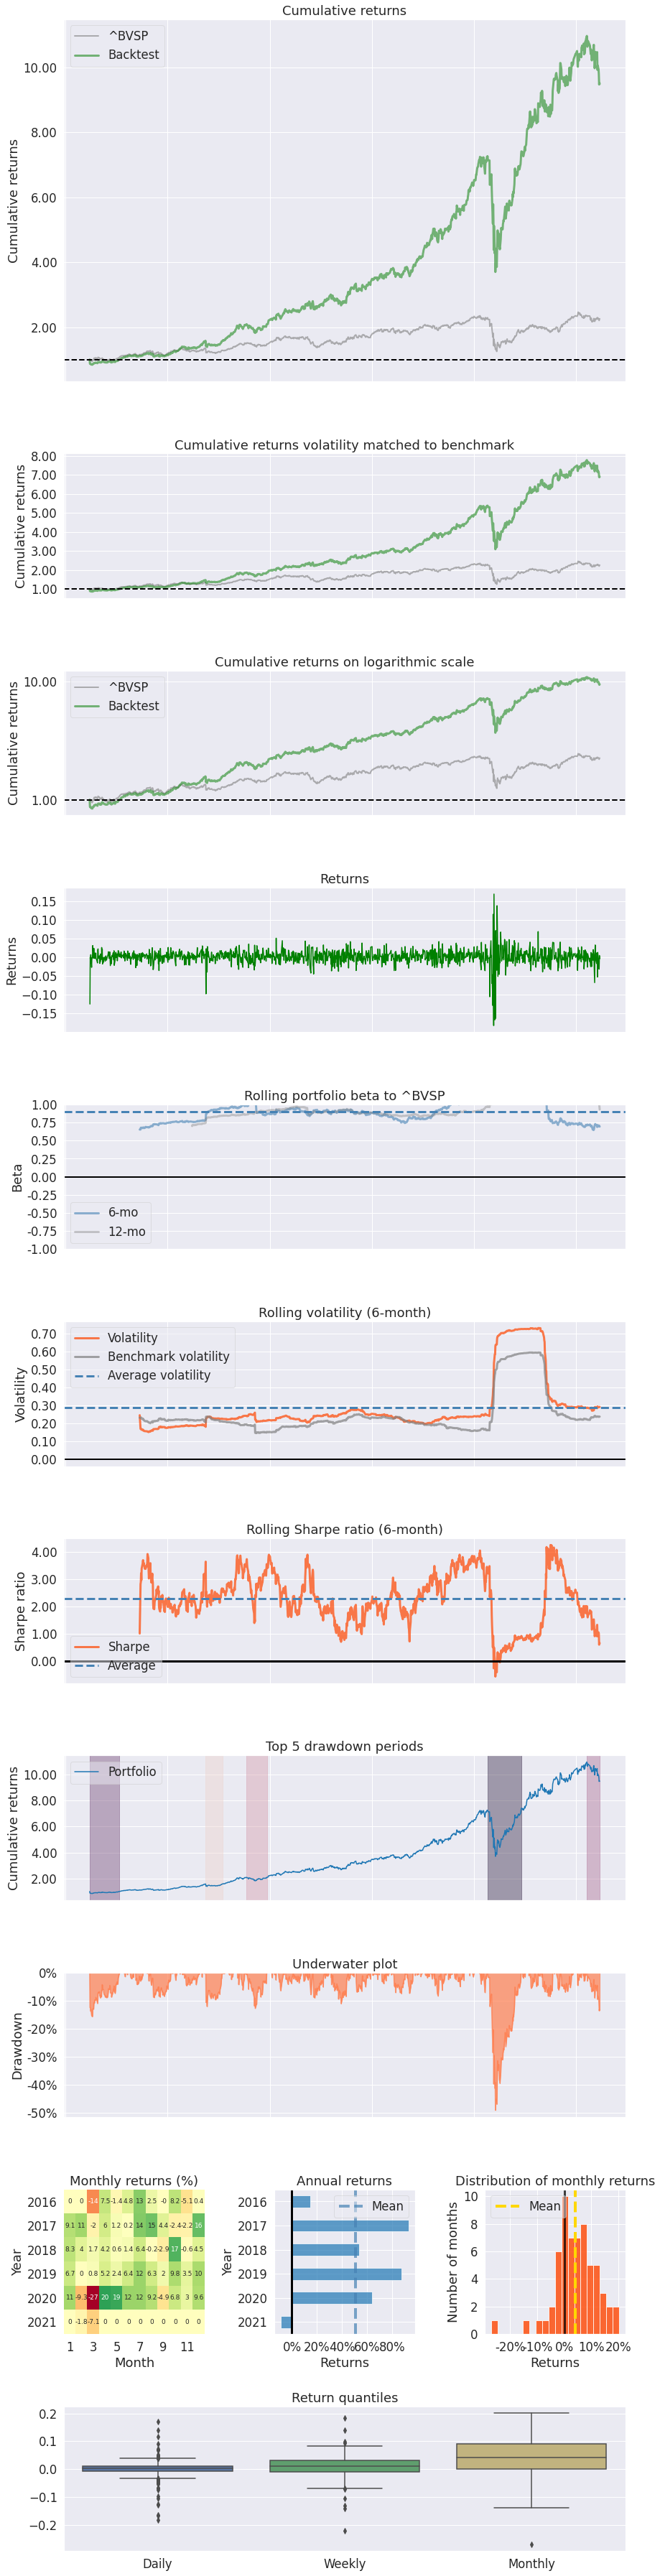

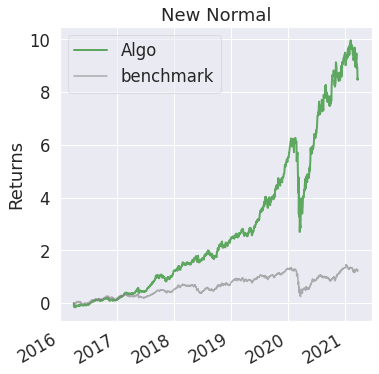

In [13]:
#retornos da carteira comparados ibovespa
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

#59 meses, retorno anual composto 57%, retorno total 848%, volatividade anual 32%, sharpe 1.57, carteira abaixo saldo no máximo 49%

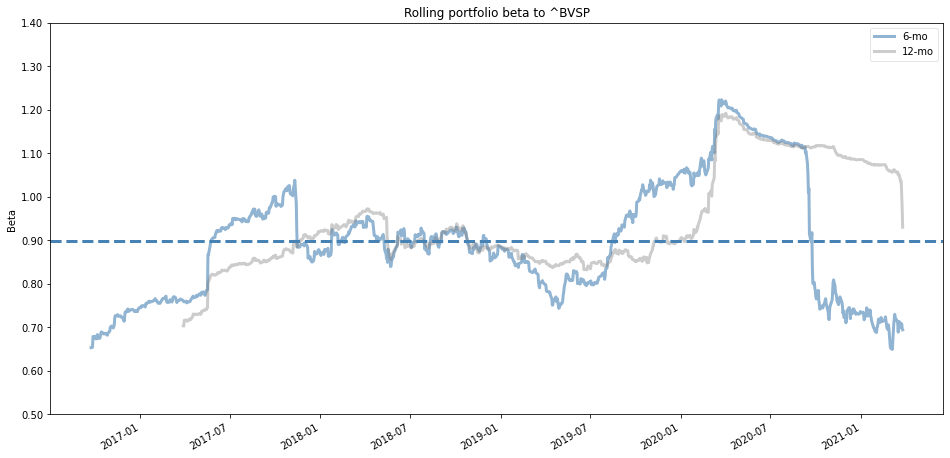

In [15]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.5, 1.4));

## 4. Análise 